# Metadata 

```yaml
Course:    DS 5001 
Module:    10 Lab
Topic:     Import General Inquirer Sentiment Lexicon
Author:    R.C. Alvarado
Date:      02 April 2023 (revised)
```

**Purpose:**
* Convert [General Inquirer lexicon](http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm) into usable form. 
* Download [the spreadsheet](http://www.wjh.harvard.edu/~inquirer/inquirerbasic.xls).
* May have to install `xlrd` 

# Setting Up

In [2]:
data_in = "../data"

In [3]:
import pandas as pd
import numpy as np

# Import GI Excel file 

It has 182 ontology/sentiment columns

In [22]:
df = pd.read_excel(f'{data_in}/lexicons/sources/inquirerbasic.xls', false_values=None)

In [23]:
df.sample(10)

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
662,ARTICULATE#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Modif SUPV,|
8201,QUALITY#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,"| 56% noun: Attribute, characteristic, charact..."
2555,CURSE#1,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,Hostile,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Noun,|
11285,VILLAGE,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| noun-adj: A small rural community
7379,PALISTINE,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun POLIT ECON PLACE,NaN
5963,LAWFUL,H4Lvd,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|
5808,JUNK,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
298,AGREE#1,H4Lvd,NaN,NaN,Pstv,Affil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 96% verb: To be of one mind, harmonize in op..."
2467,CRIMINAL,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,Hostile,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun Modif,|
2790,DEPEND#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,| 27% verb: Rely (upon)


# Handle variant terms 

Split entries like `FASCINATE#1` and `FASCINATE#2` with `FASCINATE, 1` and `FASCINATE, 2` (so our data are atomic).

In [24]:
df['split'] = df.Entry.str.split(r'[#_]+')

In [25]:
# Function to add 1 to terms without variants
def add_1(x):
    try:
        if len(x) == 1:
            x = x + ['1']
    except:
        print(x)
        x = 0
    return x

In [26]:
df['split'] = df['split'].apply(add_1)
df['term_str'] = df['split'].apply(lambda x: x[0].lower(), 1)
df['term_var'] = df['split'].apply(lambda x: x[1], 1)
df = df.set_index(['term_str', 'term_var']).sort_index()

<AxesSubplot: >

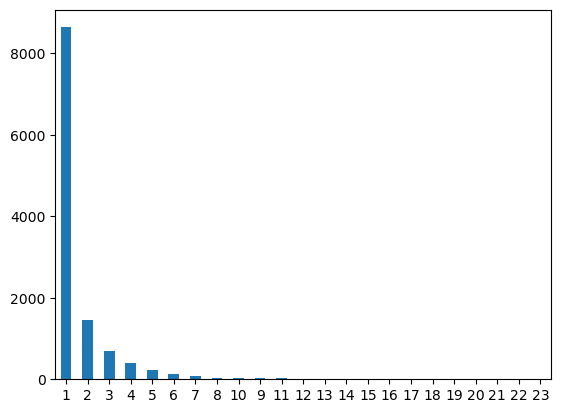

In [27]:
df.reset_index().term_var.value_counts().plot.bar(rot=0)

In [28]:
df.sample(10)

,,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
answerable,1,ANSWERABLE,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,NaN,"[ANSWERABLE, 1]"
creek,1,CREEK,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[CREEK, 1]"
venture,1,VENTURE#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[VENTURE, 1]"
molecular,1,MOLECULAR,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|,"[MOLECULAR, 1]"
hideous,1,HIDEOUS,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NegAff,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|,"[HIDEOUS, 1]"
cooperative,1,COOPERATIVE#1,H4Lvd,Positiv,NaN,Pstv,Affil,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| 68% noun-adj: An organization for the benefi...,"[COOPERATIVE, 1]"
lose,3,LOSE#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Handels,"| 2% idiom-verb: ""Lose (one's) mind""--lose one...","[LOSE, 3]"
sudden,2,SUDDEN#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NegAff,NaN,NaN,NaN,NaN,NaN,NaN,LY,"| 80% adverb-idiom: ""Suddenly,"" or ""all of a s...","[SUDDEN, 2]"
say,1,SAY#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV PFREQ,"| 91% verb: To utter or pronounce, express in ...","[SAY, 1]"


# Convert column values to numbers

In [29]:
df = df.sort_index()

In [30]:
try:
    df.loc[df.Positiv == 'Positiv', 'polarity'] = 1
    df.loc[df.Negativ == 'Negativ', 'polarity'] = -1
    df['polarity'] = df['polarity'].fillna(0).astype('int')
except TypeError as e:
    print(e, "--  This means you are re-running the script with values that have already been set.")

In [31]:
df.polarity.sample(10)

term_str     term_var
reassure     1           1
rough        1          -1
indulgence   1           1
orleans      1           0
sovereignty  1           0
choose       1           0
fine         1           1
scandalous   1          -1
liberty      1           1
allow        1           1
Name: polarity, dtype: int64

In [32]:
VALCOLS = df.columns[2:-4]

In [33]:
df[VALCOLS] = df[VALCOLS].fillna(0).astype('bool').astype('int')

In [34]:
df.loc['love', VALCOLS]#.stack().sort_values(ascending=False)

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
term_var,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# df.loc['love', (].T.style.background_gradient()

# Take and combine only sentiment 

In [59]:
sents = df.query("Positiv > 0 | Negativ > 0").copy()

In [60]:
sents['sentiment'] =  sents.Positiv  - sents.Negativ

In [61]:
sents['sentiment'].sample(5)

term_str       term_var
meager         1          -1
corruption     1          -1
visualization  1           1
arbitrate      1           1
attack         2          -1
Name: sentiment, dtype: int64

### Take average of variants

In [62]:
GI = sents.groupby('term_str').sentiment.mean()

### Snap values to -1, 0, or 1

In [71]:
GI = np.sign(GI).astype('int').to_frame()

In [72]:
GI.shape

(3626, 1)

In [73]:
GI.sample(10)

,sentiment
term_str,
erode,-1
relieve,1
complex,-1
haunt,-1
cruel,-1
crumble,-1
exuberant,1
realistically,1
default,-1


<AxesSubplot: ylabel='sentiment'>

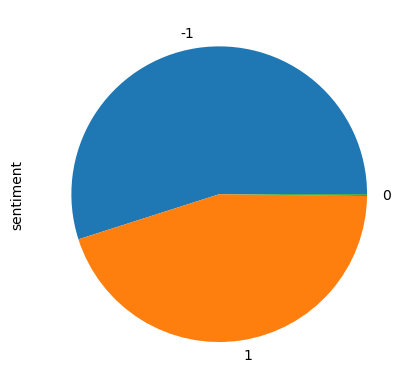

In [78]:
GI.sentiment.value_counts().plot.pie()

## Save

In [74]:
GI.to_csv(data_in + '/lexicons/sources/gi.csv')